In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset 
data = pd.read_csv("Dataset .csv")
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [4]:
data.shape

(9551, 21)

**Data exploration**

In [5]:
#checking the number of null values in all the coulumns
data.isnull().sum()         # here the cuisines have 9 null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#Drop all rows which have the null values
data = data.dropna() 
data.shape

(9542, 21)

**TASK 1 (Restaurant rating)**

**Analyze the didtribution of aggregate rating and determine most common rating range**

In [34]:
#counting all the occurance of aggregate rating in the dataset
data1 = data["Aggregate rating"].value_counts()
print(data1.sort_index().index)
print()
print(data1.sort_index().values)

Index([0.0, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9],
      dtype='float64', name='Aggregate rating')

[2148    1    2    7   15   27   47   87  110  191  250  315  381  468
  519  522  483  495  480  458  427  399  332  266  274  221  174  143
   95   78   41   25   61]


In [8]:
#find the maximum number of occurance of the rating
data2 = data1.idxmax()
print('Most common aggregate rating is', data2)

Most common aggregate rating is 0.0


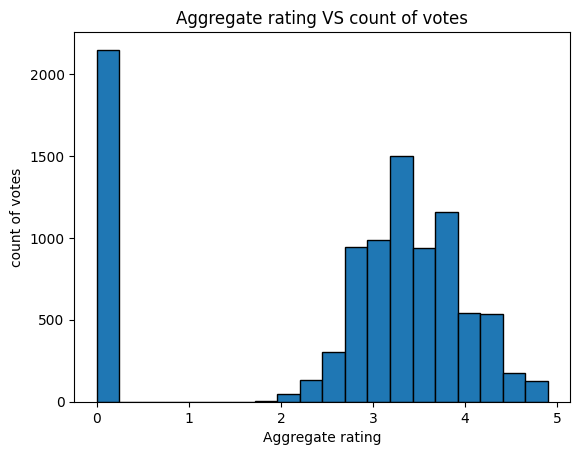

In [41]:
#plot the histogram of count of aggregate rating 
plt.hist(data["Aggregate rating"], edgecolor = "Black", bins = 20)
plt.xlabel("Aggregate rating")
plt.ylabel("count of votes")
plt.title("Aggregate rating VS count of votes")
plt.show()

**Calculate average number of votes recieved by restaurant**

In [36]:
#find the mean of the votes
grp = data["Votes"].mean()
print("Average number of votes recieved by restaurant are", grp)

Average number of votes recieved by restaurant are 156.7720603647034


**TASK 2 (Cuisines combination)**

**Identify most common combination of cuisines**

In [37]:
#counting all the cuisines occurance in the dataset
grp = data["Cuisines"].value_counts()
print('Most common combination of cuisine :- ')
#get the top 10 sorted cuisnes counts
new_data = grp.head(10).sort_values()
print(new_data)

Most common combination of cuisine :- 
Cuisines
Street Food                       149
Bakery, Desserts                  170
North Indian, Mughlai, Chinese    197
Bakery                            218
Cafe                              299
North Indian, Mughlai             334
Chinese                           354
Fast Food                         354
North Indian, Chinese             511
North Indian                      936
Name: count, dtype: int64


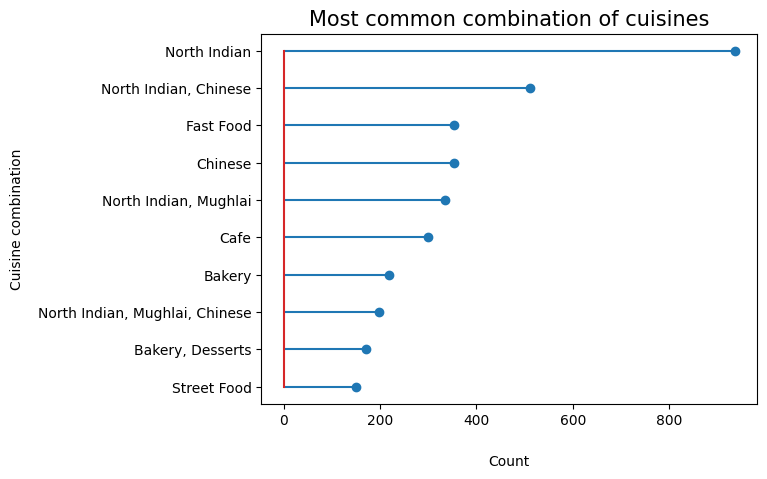

In [38]:
#stem plot for the above
plt.stem(new_data.index, new_data.values,orientation = "horizontal")
plt.xlabel("Count",labelpad= 20, size = 10)
plt.ylabel("Cuisine combination",labelpad= 10, size = 10)
plt.title("Most common combination of cuisines", size = 15)
plt.show()

In [39]:
#Splitting the column cuisines to get the individual cuisines
splited_cuisines = data["Cuisines"].str.split(', ')
#Flatten the list iof cuisines combination
cuisines = [cuisine for sublist in splited_cuisines for cuisine in sublist]
#storing the splitted cuisnes in series and counting the occurance of cuisines
data1 = pd.Series(cuisines).value_counts()
print("Most common cusines found are :- ")
print(data1)

Most common cusines found are :- 
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Cuisine Varies       1
Fish and Chips       1
Durban               1
D�_ner               1
B�_rek               1
Name: count, Length: 145, dtype: int64


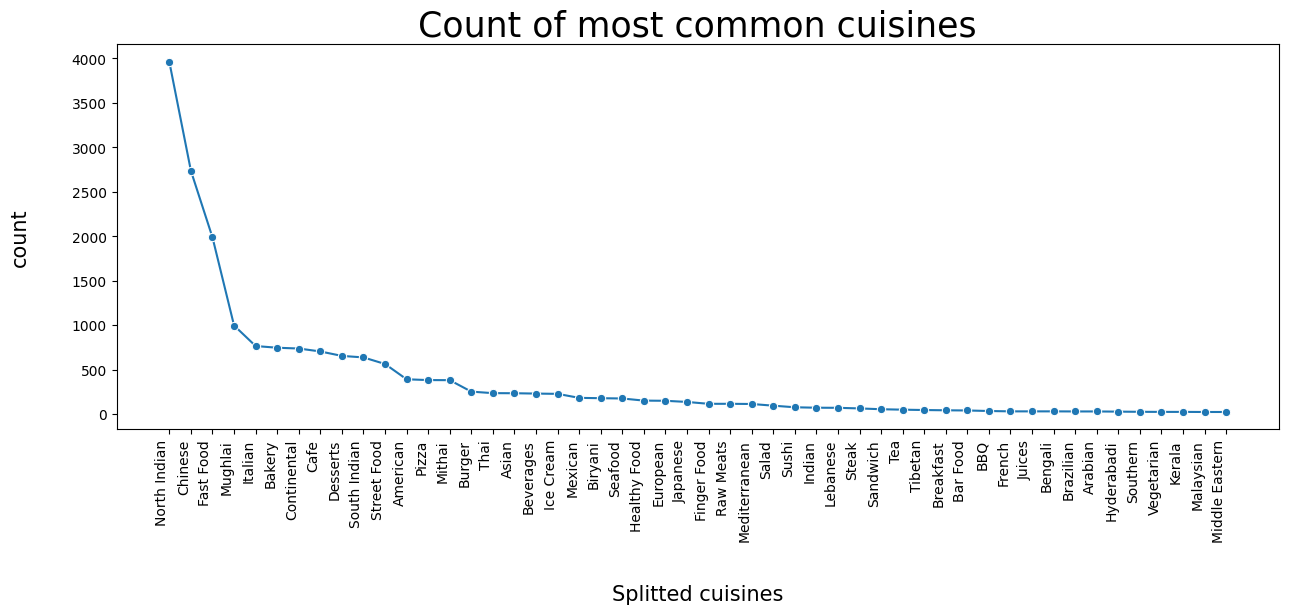

In [40]:
#graph a line plot for the above
plt.figure(figsize =[15,5])
sns.lineplot(data = data1.head(50), marker = "o")
plt.xlabel("Splitted cuisines",labelpad= 30, size = 15)
plt.ylabel("count", labelpad= 30, size = 15)
plt.title("Count of most common cuisines", size = 25)
plt.xticks(rotation=90, ha='right')
plt.show()

**Determine if certain cuisines combination tend to have higher rating**

In [15]:
#count the occurance of cuisines with respect to aggregate rating
grp = data.groupby("Cuisines")["Aggregate rating"].mean()
#printing the 10 largest 
new_data = grp.nlargest(10)
print("Average rating for top 10 cuisines combination :-")
print(new_data)

Average rating for top 10 cuisines combination :-
Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64


**TASK 3 (Geographic analysis)**

**A) PLot the location of restaurant on a map using longitude and latitude coordinates**

**B) Identify any pattern of restaurant in specific areas**

In [16]:
import folium
from folium.plugins import MarkerCluster

In [42]:
#map centerd at specific location
m = folium.Map(location = [14.565443,121.027535], tiles = 'OpenStreetMap', zoom_start = 5)
#marker cluster group
marker = MarkerCluster().add_to(m)

In [18]:
#add marker for all the restaurant location to the cluster group
for i,row in data.iterrows():
    restaurant_name = row["Restaurant Name"]
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    popup_text = f"Restaurant: {restaurant_name}\nCuisines: {row["Cuisines"]}\nRating: {row["Aggregate rating"]}"
    folium.Marker(location = [latitude, longitude], popup = popup_text, icon = folium.Icon(color ='blue')).add_to(m)

In [43]:
#saving the map and displaying on the web page
m.save('Map.html')

**TASK 4 (Restaurant chains)**

**Identify if there is any restaurant chain present**

In [20]:
#count the occurance of restaurant 
restaurant_chain = data["Restaurant Name"].value_counts()
#filter restaurant that appear more than once
restaurant_chain = restaurant_chain[restaurant_chain > 1]

if not restaurant_chain.empty:
    print("Restaurant chain identified")
    data3 = restaurant_chain.head(10)
    print(data3)
else:
    print("Chain not identified")
    

Restaurant chain identified
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


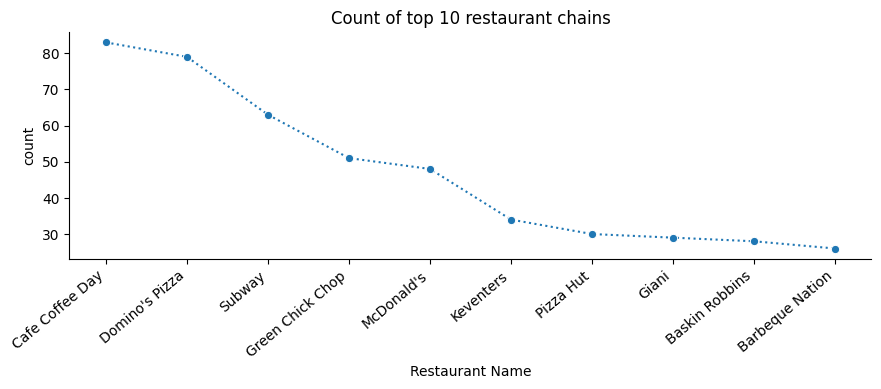

In [44]:
#relation plot for the above of top 10 resaturant 
sns.relplot(data3, height =3, aspect =3, kind = "line", marker = "o", ls = ":")
plt.title("Count of top 10 restaurant chains")
plt.xticks(rotation=40, ha='right')
plt.show()

**Analyze the rating and popularity of different restaurant**

In [45]:
#group the restaurant name by the mean of the aggregate rating 
rating_chain = data.groupby("Restaurant Name")["Aggregate rating"].mean()
#group the restaurant name by the mean of the votes
popularity_chain = data.groupby("Restaurant Name")["Votes"].sum()

In [23]:
#convert the rating_chain and popularity_chain into dataframes
data6 = pd.DataFrame({"Average rating" : rating_chain, "Total votes" : popularity_chain})

In [46]:
#now sort the dataframes according to the average rating
data6 = data6.sort_values(by = "Average rating", ascending = False)
data6

,Average rating,Total votes
Restaurant Name,,
Ministry of Crab,4.9,203
McGuire's Irish Pub & Brewery,4.9,2238
Ooma,4.9,365
Tresind - Nassima Royal Hotel,4.9,1352
Masala Library,4.9,408
...,...,...
Yadav Ji Chholey Bhature,0.0,1
Yadav Sweets,0.0,2
Pastry Place,0.0,2


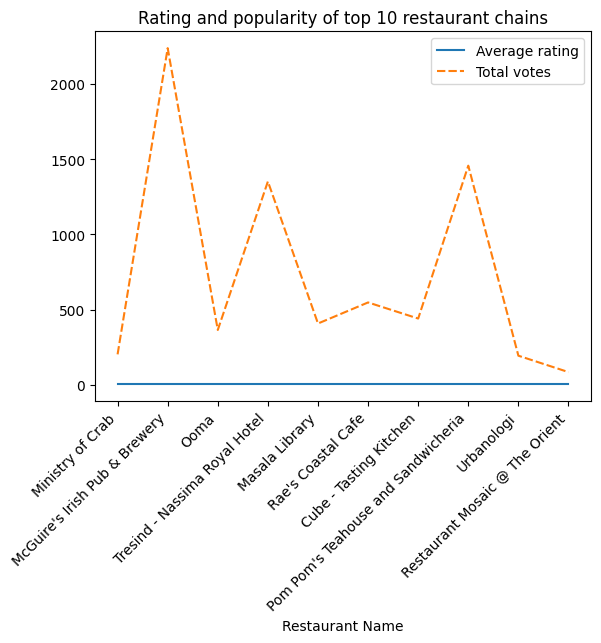

In [48]:
#Now plot the line graph of the dataframe of top 10 restaurant name
sns.lineplot(data = data6[:10], legend = "brief")
plt.xticks(rotation=45, ha='right')
plt.title("Rating and popularity of top 10 restaurant chains")
plt.show()

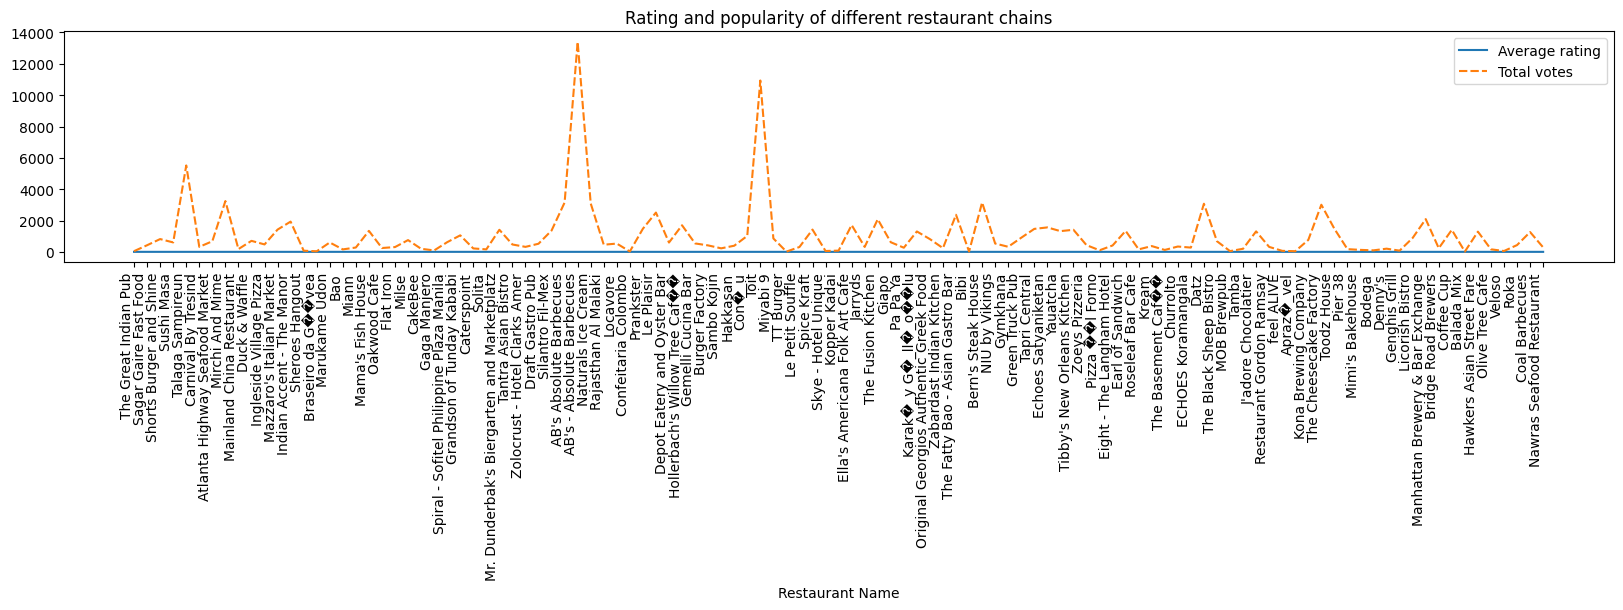

In [50]:
#ploting again the graph after the top 10 restaurant name
plt.figure(figsize = [20,3])
sns.lineplot(data = data6[11:120], legend = "brief")
plt.xticks(rotation=90, ha='right')
plt.title("Rating and popularity of different restaurant chains")
plt.show()